In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [102]:
data = pd.read_csv("DOGE-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


Now, lets check the correlation

In [104]:
# Convert the 'Date' column to datetime objects if you want to use it for analysis
data['Date'] = pd.to_datetime(data['Date'])

# Calculate correlations on numerical columns only
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

print(correlation_matrix)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.993904  0.993707  0.992514   0.992514  0.554850
High       0.993904  1.000000  0.986497  0.995104   0.995104  0.619321
Low        0.993707  0.986497  1.000000  0.994575   0.994575  0.519991
Close      0.992514  0.995104  0.994575  1.000000   1.000000  0.588678
Adj Close  0.992514  0.995104  0.994575  1.000000   1.000000  0.588678
Volume     0.554850  0.619321  0.519991  0.588678   0.588678  1.000000


Converting the string data & time in proper date & time format with the help of pandas. Ater that check is there any null value is present or not.

In [105]:
data['Date'] = pd.to_datetime(data['Date'],
                              infer_datetime_format=True)
data.set_index('Date', inplace=True)

data.isnull().any()

<ipython-input-105-65fccfe0dcf0>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'],


,0
Open,True
High,True
Low,True
Close,True
Adj Close,True
Volume,True


Now, let's check for the presence of null values in the datset.

In [106]:
data.isnull().sum()

,0
Open,1
High,1
Low,1
Close,1
Adj Close,1
Volume,1


Dropping those missing values so that we do not have any errors while analyzing.

In [107]:
data = data.dropna()

Now, check the statistical analysis of the data using describe() method.

In [108]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


Now, firstly we will analyze the closing price as we need it to perform the prediction.

Text(0.5, 1.0, 'Date vs Close of 2021')

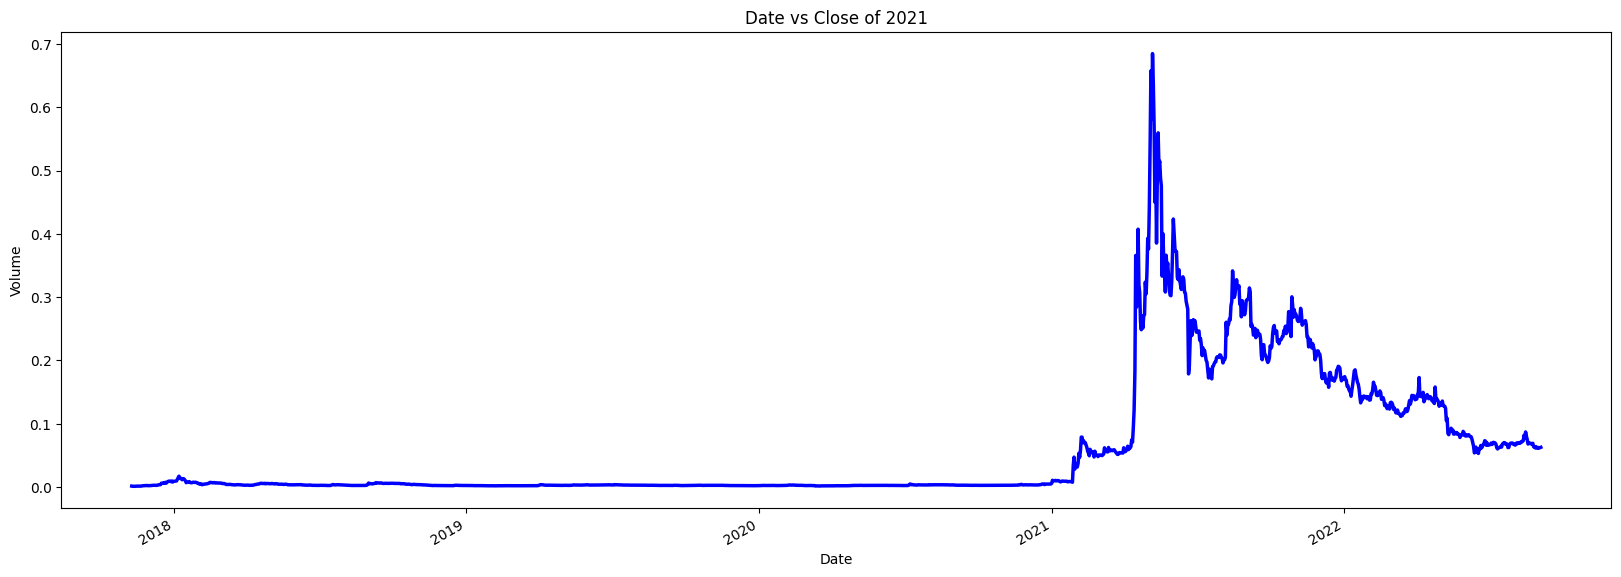

In [109]:
plt.figure(figsize=(20, 7))
x = data.groupby('Date')['Close'].mean()
x.plot(linewidth=2.5, color='b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2021")

The column 'Close' is our predicted feature. We are taking different factors from the predefine factors for our own calcultaion and naming them suitably. Also, we are checking each factor while correlating with the 'Close' column while sorting it in descending order.

In [110]:
data["gap"] = (data["High"] - data["Low"]) * data["Volume"]
data["y"] = data["High"] / data["Volume"]
data["z"] = data["Low"] / data["Volume"]
data["a"] = data["High"] / data["Low"]
data["b"] = (data["High"] / data["Low"]) * data["Volume"]
abs(data.corr()["Close"].sort_values(ascending=False))

<ipython-input-110-425adacaf344>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gap"] = (data["High"] - data["Low"]) * data["Volume"]
<ipython-input-110-425adacaf344>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["y"] = data["High"] / data["Volume"]
<ipython-input-110-425adacaf344>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,Close
Close,1.000000
Adj Close,1.000000
High,0.995104
Low,0.994575
Open,0.992514
Volume,0.588678
b,0.456479
gap,0.383333
a,0.172057
z,0.063251


By, observing the correlating factors, we can choose a few of them. We are excluding High,Low, and Open as they are highly correlated from the beginning.

In [111]:
data = data[["Close", "Volume", "gap", "a", "b"]]
data.head()

,Close,Volume,gap,a,b
Date,,,,,
2017-11-09,0.001415,6259550.0,1464.73470,1.198137,7.499800e+06
2017-11-10,0.001163,4246520.0,1299.43512,1.272000,5.401573e+06
2017-11-11,0.001201,2231080.0,258.80528,1.101665,2.457903e+06
2017-11-12,0.001038,3288960.0,684.10368,1.207585,3.971698e+06
2017-11-13,0.001211,2481270.0,478.88511,1.189401,2.951226e+06


Introducing the ARIMA model for Time Series Analysis. ARIMA stands for autoregressive integrated moving average model and is specified by three order parameters: (p,d,q) where AR stands for Autoregression i.e p,l stands for integration i.e d, MA stands for Moving Average i.e q. Whereas, SARIMAX is seasonal ARIMA with exogenous variables.

In [112]:
df2 = data.tail(30)
train = df2[:11]
test = df2[-19:]

print(train.shape, test.shape)

(11, 5) (19, 5)


The shape of the train is (11,5), and the test is (19,5). Let's implement the SARIMAX model and see the results.

# Model Development

In [113]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=train["Close"], exog=train.drop(
    "Close", axis=1), order=(2, 1, 1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  47.663
Date:                Wed, 21 Aug 2024   AIC                            -79.326
Time:                        23:31:49   BIC                            -76.905
Sample:                    08-05-2022   HQIC                           -81.981
                         - 08-15-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      7.491e-10   1.84e-10      4.077      0.000    3.89e-10    1.11e-09
gap          1.13e-08   2.45e-09      4.615      0.000     6.5e-09    1.61e-08
a             -0.0073   5.05e-15  -1.44e+12      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Now, observe the prediction in time series.

In [114]:
start = 11
end = 29
predictions = results.predict(
    start=start,
    end=end,
    exog=test.drop("Close", axis=1))
predictions

,predicted_mean
2022-08-16,0.097293
2022-08-17,0.083717
2022-08-18,0.075957
2022-08-19,0.069575
2022-08-20,0.071583
2022-08-21,0.072099
2022-08-22,0.071244
2022-08-23,0.072458
2022-08-24,0.072406
2022-08-25,0.071893


Finaly, plot the prediction to get a visulaization.

<Axes: xlabel='Date'>

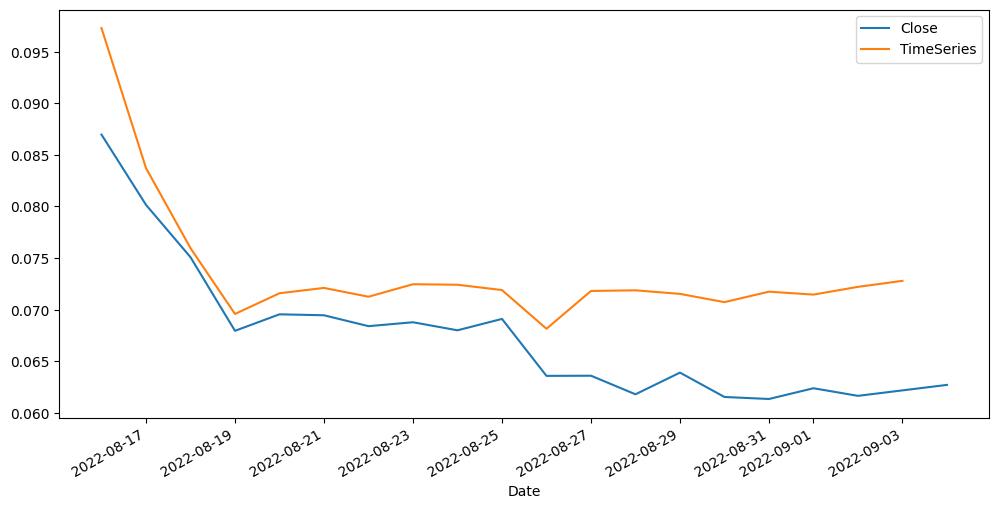

In [115]:
test["Close"].plot(legend=True, figsize=(12, 6))
predictions.plot(label='TimeSeries', legend=True)